In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

(432, 576, 3)


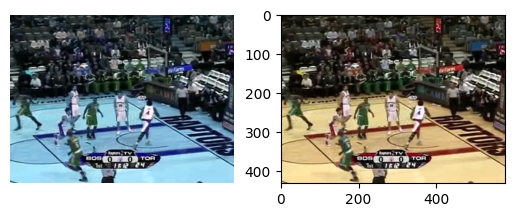

In [4]:
img = cv2.imread('img/fig.jpg')
print(img.shape)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.subplot(221)
plt.axis('off')
plt.imshow(img)
plt.subplot(222)
plt.imshow(img_rgb)

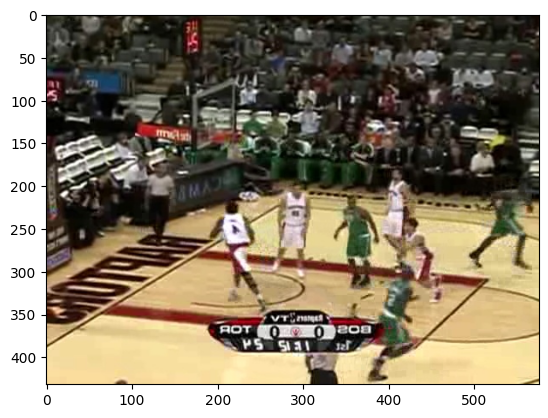

In [6]:
import numpy as np
img_np = np.array(img_rgb)
# img_np_tb = img_np[::-1, ...]
img_np_lr = img_np[:,::-1,:]

# plt.figure()
plt.imshow(img_np_lr)
# plt.show()

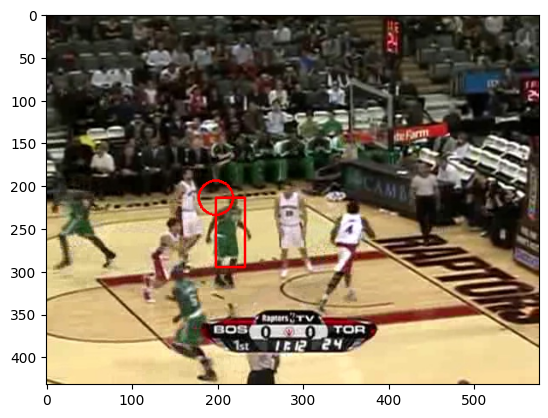

In [8]:
gt_state = [198,214,34,81] 
cv2.rectangle(img_rgb, (gt_state[0],gt_state[1]), (gt_state[0] + gt_state[2],gt_state[1] + gt_state[3]), (255, 0, 0), 2)

cv2.circle(img_rgb, (gt_state[0],gt_state[1]), 20, (255, 0, 0), 2)

# im_crop = img_rgb[gt_state[1]:gt_state[1] + gt_state[3],gt_state[0]:gt_state[0] + gt_state[2]]

plt.imshow(img_rgb)

In [9]:
def im_read(path):
    return cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2RGB)

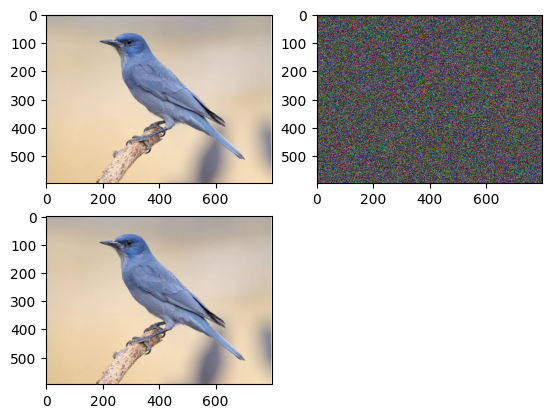

In [22]:
img1 = im_read('img/bird.jpg')

plt.subplot(221)
plt.imshow(img1)

noise = np.random.randn(*img1.shape)
plt.subplot(222)
plt.imshow(np.clip(noise,0,1))

img1 = img1+noise
img_noise = np.clip(img1,0,255)

plt.subplot(223)
plt.imshow(img_noise.astype(np.int32))

In [24]:
# 图片融合
img1 = im_read('img/fg.jpg')
img2 = im_read('img/bg.jpg')
print(img1.shape, img2.shape)
img2 = cv2.resize(img2, (img1.shape[1],img1.shape[0]))
print(img1.shape, img2.shape)

(428, 722, 3) (657, 830, 3)
(428, 722, 3) (428, 722, 3)


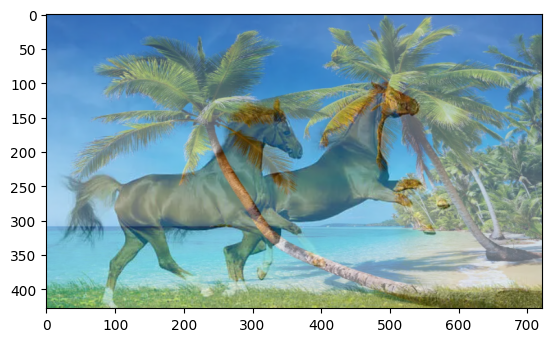

In [36]:
#img_fusion = cv2.addWeighted(img1,0.5,img2,0.5,0)  #图像融合
img_fusion = 0.5 * img1 + img2 * 0.5  #图像融合

# plt.subplot(221)
# plt.imshow(img1)
# plt.subplot(222)
# plt.imshow(img2)
# plt.subplot(223)
plt.imshow(np.clip(np.array(img_fusion, np.int32),0, 255)) #.astype(np.int32)

In [38]:
import cv2
import os

img_path = './img/bird'
img_dir = os.listdir(img_path)
img = cv2.imread(os.path.join(img_path,img_dir[0]))
img_size = img.shape[:2] # 1280 720
# print(img_size)

video = cv2.VideoWriter('img/video.avi', cv2.VideoWriter_fourcc(*'MJPG'), 25, (img_size[1],img_size[0]))  
for i in img_dir:
    img = cv2.imread(os.path.join(img_path,i))
#     img = cv2.resize(img, img_size)
    video.write(img)
video.release()
print("视频合成成功！")

视频合成成功！


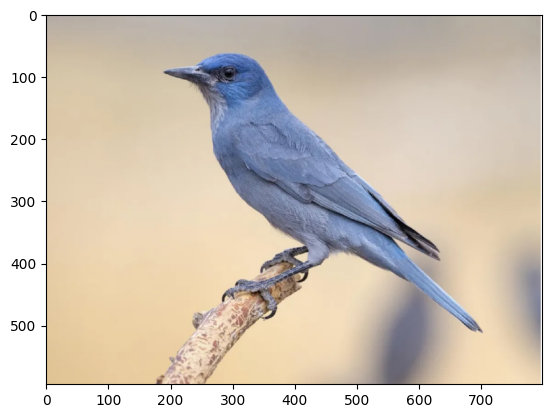

In [39]:
# 图像滤波
img = im_read('./img/bird.jpg')
blur = cv2.blur(img,(5,5))
g_blur = cv2.GaussianBlur(img,(5,5), 0)
m_blur = cv2.medianBlur(img,5)
b_blur = cv2.bilateralFilter(img,9,75,75)
plt.imshow(img)

In [50]:
hsv = cv2.cvtColor(g_blur, cv2.COLOR_RGB2HSV) #H:0-180, S&V:0-255
low_blue = np.array([55, 0, 0])
high_blue = np.array([118, 255, 255])
mask = cv2.inRange(hsv, low_blue, high_blue)

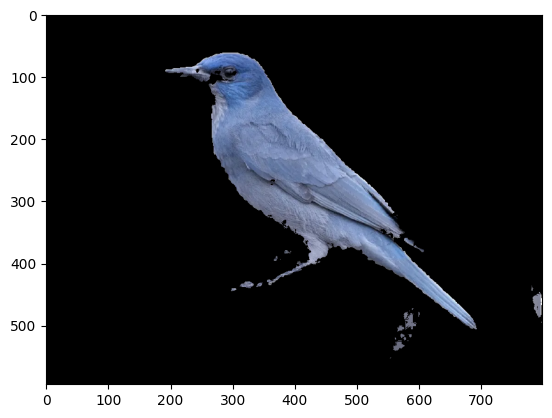

In [51]:
img_mask = cv2.bitwise_and(img,img, mask=mask)
plt.imshow(img_mask)